# Importe librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score
from seaborn import heatmap
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

# Funciones 

## Entrenamiento

In [2]:
def entrenamiento_and_report_simple(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

In [3]:
def entrenamiento_and_report_red_neuronal(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

## Optimizacion de parametros

In [4]:
def Optimizacion_parametros(param_grid,Modelo,data_entrenamiento,objetivo,cv):
    grid_search = GridSearchCV(Modelo, param_grid, cv=cv,
                           scoring='precision', 
                           return_train_score=True)
    grid_search.fit(data_entrenamiento, objetivo)
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a['mean_train_score'] = grid_search.cv_results_['mean_train_score']
    a['mean_test_score'] = grid_search.cv_results_['mean_test_score']
    a['std_train_score'] = grid_search.cv_results_['std_train_score']
    a['std_test_score'] = grid_search.cv_results_['std_test_score']
    print('Mejor resultado' +''+ str(grid_search.best_score_)  )     
    print('Mejor parametro' +''+ str(grid_search.best_estimator_)) 
    minv = grid_search.best_score_
    return a, a[(a.mean_test_score == minv)],grid_search.best_estimator_,grid_search.best_score_



# Funcion PCA

In [5]:
def PCA_conversion(datos,Numero_parametros, nombre_variable):
    scaler=StandardScaler()#normalizamos los datos
    scaler.fit(datos) # calculo la media para poder hacer la transformacion
    X_scaled=scaler.transform(datos)# Ahora si, escalo los datos y los normalizo
    pca=PCA(n_components=Numero_parametros) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
    pca.fit(X_scaled) # obtener los componentes principales
    ear2_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PC
    
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    print('suma:',sum(expl[0:5]))
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    
    print('suma:',sum(expl[0:1000]))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    
    x = range(1, Numero_parametros + 1)
    new_columns = []
    for n in x:
        name = 'nombre_variable' +  str(n)
        new_columns.append(name)

    bm = pd.DataFrame(data = ear2_pca, columns = new_columns)
    bm.index = np.arange(1,len(bm)+1)
    return bm

## Carga de datos

In [6]:
path_dataset = 'archive/innerArm.csv'
ear = pd.read_csv(path_dataset)
ear = ear.iloc[1:]
y = ear['has_DM2']
path_dataset = 'archive/innerArmData.csv'
ear2 = pd.read_csv(path_dataset)
ear2= (ear2.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(ear2.shape[1])], axis=1))
ear2= ear2.apply(pd.to_numeric, errors='coerce')

In [7]:
ear2

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.992,Q1.993,Q1.994,Q1.995,Q1.996,Q1.997,Q1.998,Q1.999,Q1.1000,Q1.1001
0,1.012269,1.009869,0.990157,0.955288,0.941267,0.976607,1.006972,0.980801,0.953676,0.974204,...,0.794150,0.856659,0.910546,0.776510,0.668612,0.648977,0.742685,0.879109,0.872117,0.862333
1,-0.142104,-0.140321,-0.111815,-0.059399,-0.038415,-0.092203,-0.142756,-0.126602,-0.110894,-0.127766,...,-0.177075,-0.258574,-0.298494,-0.219362,-0.147198,-0.106608,-0.155721,-0.242821,-0.222908,-0.188102
2,2.399184,2.375479,2.353516,2.333556,2.322815,2.333253,2.337708,2.319870,2.297810,2.320618,...,2.293997,2.202739,2.057599,2.099680,2.144933,2.179983,2.231222,2.272570,2.202002,2.163035
3,-0.518188,-0.516911,-0.520209,-0.527781,-0.537212,-0.551348,-0.562767,-0.546535,-0.529844,-0.526677,...,-0.538902,-0.539996,-0.538926,-0.524594,-0.500497,-0.455921,-0.457110,-0.478436,-0.486584,-0.477205
4,-0.505397,-0.530900,-0.533014,-0.514919,-0.502197,-0.501776,-0.504887,-0.564109,-0.619469,-0.595831,...,-0.572665,-0.617754,-0.628712,-0.592971,-0.554546,-0.517180,-0.490139,-0.468363,-0.475787,-0.467514
5,0.113640,0.033748,-0.011516,-0.027414,-0.011492,0.081586,0.164487,0.073528,-0.013532,-0.007141,...,-0.119101,-0.081602,0.020539,-0.083325,-0.112887,0.065480,0.027982,-0.110393,-0.057771,-0.027867
6,-0.122825,-0.143021,-0.137761,-0.110180,-0.093710,-0.103301,-0.111099,-0.094124,-0.077704,-0.092094,...,-0.223457,-0.186857,-0.216164,-0.107634,-0.054140,-0.150463,-0.141244,-0.079808,-0.047718,-0.047629
7,-0.682724,-0.659020,-0.655649,-0.670253,-0.682686,-0.690209,-0.696071,-0.694285,-0.691076,-0.684653,...,-0.604233,-0.561697,-0.584536,-0.499120,-0.460286,-0.549272,-0.573335,-0.560192,-0.546897,-0.531893
8,1.101360,1.112376,1.120894,1.127839,1.133147,1.134437,1.135848,1.165841,1.191975,1.161273,...,1.381214,1.395264,1.338561,1.309190,1.298637,1.333464,1.349213,1.346178,1.298731,1.258076
9,-1.476973,-1.482733,-1.486888,-1.490309,-1.491144,-1.485422,-1.475957,-1.459788,-1.441183,-1.440357,...,-1.386641,-1.445386,-1.503073,-1.510874,-1.497695,-1.448945,-1.389709,-1.325811,-1.407832,-1.457136


# Optimizacion de modelo

## XGBClassifier

In [8]:
from xgboost import XGBClassifier

In [9]:
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [10]:
XGBClassifier = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [11]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,XGBClassifier,ear2,y,5)

[21:23:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [12]:
best_score

1.0

In [13]:
best_stimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [14]:
total_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.00,1.0,0.000,0.0
1,3,3,0.45,0.4,0.225,0.2
2,3,5,0.00,0.0,0.000,0.0
3,5,1,1.00,1.0,0.000,0.0
4,5,3,0.45,0.4,0.225,0.2
5,5,5,0.00,0.0,0.000,0.0
6,7,1,1.00,1.0,0.000,0.0
7,7,3,0.45,0.4,0.225,0.2
8,7,5,0.00,0.0,0.000,0.0
9,9,1,1.00,1.0,0.000,0.0


In [15]:
mejores_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.0,1.0,0.0,0.0
3,5,1,1.0,1.0,0.0,0.0
6,7,1,1.0,1.0,0.0,0.0
9,9,1,1.0,1.0,0.0,0.0


## Adabost

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [17]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [18]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [19]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,ada_clf,ear2,y,5)

Mejor resultado1.0
Mejor parametroAdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01)


In [20]:
best_score

1.0

In [21]:
best_stimator

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01)

In [22]:
total_parametros

,base_estimator__max_depth,base_estimator__min_samples_leaf,learning_rate,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,2,5,0.01,10,1.00,0.933333,0.000,0.133333
1,2,5,0.01,50,1.00,1.000000,0.000,0.000000
2,2,5,0.01,250,1.00,1.000000,0.000,0.000000
3,2,5,0.01,1000,1.00,1.000000,0.000,0.000000
4,2,5,0.10,10,1.00,0.933333,0.000,0.133333
...,...,...,...,...,...,...,...,...
75,10,10,0.01,1000,0.45,0.400000,0.225,0.200000
76,10,10,0.10,10,0.45,0.400000,0.225,0.200000
77,10,10,0.10,50,0.45,0.400000,0.225,0.200000
78,10,10,0.10,250,0.45,0.400000,0.225,0.200000


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 600, 800]}

In [25]:
RandomForestClassifier = RandomForestClassifier()

In [26]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,RandomForestClassifier,ear2,y,5)

Mejor resultado1.0
Mejor parametroRandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)


In [27]:
best_score

1.0

In [28]:
best_stimator

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [29]:
total_parametros

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,True,10,auto,2,2,200,1.0,1.0,0.0,0.0
1,True,10,auto,2,2,400,1.0,1.0,0.0,0.0
2,True,10,auto,2,2,600,1.0,1.0,0.0,0.0
3,True,10,auto,2,2,800,1.0,1.0,0.0,0.0
4,True,10,auto,2,5,200,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
123,False,20,sqrt,4,2,800,1.0,1.0,0.0,0.0
124,False,20,sqrt,4,5,200,1.0,1.0,0.0,0.0
125,False,20,sqrt,4,5,400,1.0,1.0,0.0,0.0
126,False,20,sqrt,4,5,600,1.0,1.0,0.0,0.0


## SVM

In [30]:
from sklearn.svm import SVC

In [31]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [32]:
svc = SVC()

In [33]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,svc,ear2,y,5)

Mejor resultado1.0
Mejor parametroSVC(C=1, gamma=0.0001)


In [34]:
best_score

1.0

In [35]:
best_stimator

SVC(C=1, gamma=0.0001)

In [36]:
total_parametros

,C,gamma,kernel,mean_train_score,mean_test_score,std_train_score,std_test_score
0,1,0.0010,rbf,1.0,0.933333,0.0,0.133333
1,1,0.0001,rbf,1.0,1.000000,0.0,0.000000
2,10,0.0010,rbf,1.0,0.933333,0.0,0.133333
3,10,0.0001,rbf,1.0,0.933333,0.0,0.133333
4,100,0.0010,rbf,1.0,0.933333,0.0,0.133333
5,100,0.0001,rbf,1.0,0.933333,0.0,0.133333
6,1000,0.0010,rbf,1.0,0.933333,0.0,0.133333
7,1000,0.0001,rbf,1.0,0.933333,0.0,0.133333
8,1,NaN,linear,1.0,0.933333,0.0,0.133333
9,10,NaN,linear,1.0,0.933333,0.0,0.133333


# Creacion de modelos

## XGBClassifier 

In [37]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Adabost

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

## SVM

In [40]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma=0.0001)

## Red neuronal

In [41]:
from keras.models import Sequential
from keras import layers

max_features = ear2.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16032     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


# Spectograma despues del Filtro vancouver

In [42]:
path_dataset = 'archive/innerArmData.csv'
eardata = pd.read_csv(path_dataset)
eardata= (eardata.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(eardata.shape[1])], axis=1))
eardata= eardata.apply(pd.to_numeric, errors='coerce')

## XGBClassifier 

[21:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

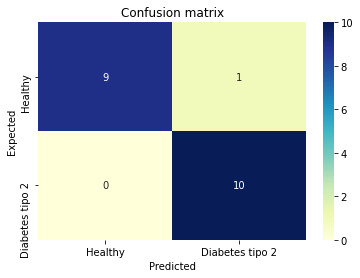

<Figure size 432x288 with 0 Axes>

In [43]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



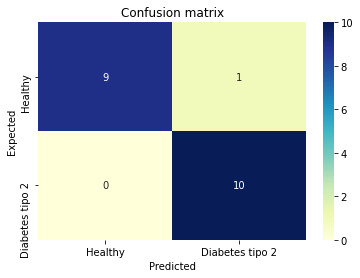

<Figure size 432x288 with 0 Axes>

In [44]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



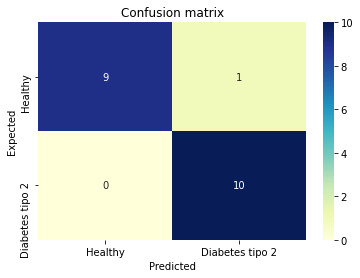

<Figure size 432x288 with 0 Axes>

In [45]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



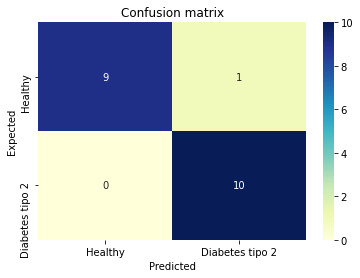

<Figure size 432x288 with 0 Axes>

In [46]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



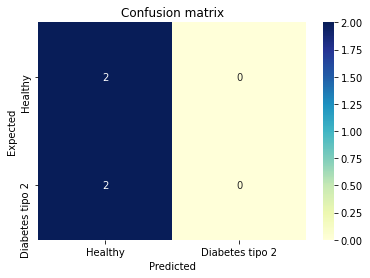

<Figure size 432x288 with 0 Axes>

In [47]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

In [48]:
y_test

1     1.0
18    0.0
16    0.0
2     1.0
Name: has_DM2, dtype: float64

# Spectograma despues del Filtro vancouver con PCA

shape of X_pca (20, 5)
[9.98444682e-01 7.36987234e-04 2.79796789e-04 8.63646983e-05
 6.53813347e-05]
suma: 0.9996132117125137
shape of X_pca (20, 5)
[9.98444682e-01 7.36987234e-04 2.79796789e-04 8.63646983e-05
 6.53813347e-05]
suma: 0.9996132117125137


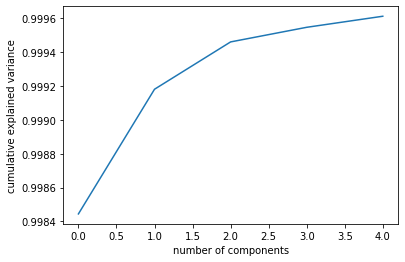

In [49]:
eardata = PCA_conversion(eardata,5,"innerArm")

## XGBClassifier

[21:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

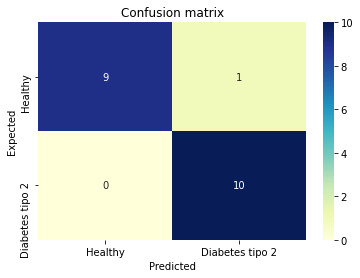

<Figure size 432x288 with 0 Axes>

In [50]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



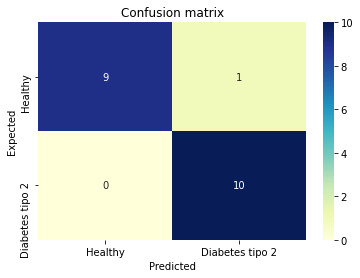

<Figure size 432x288 with 0 Axes>

In [51]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



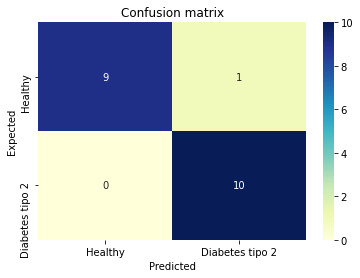

<Figure size 432x288 with 0 Axes>

In [52]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



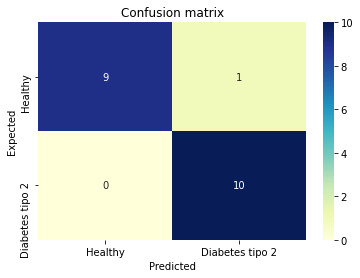

<Figure size 432x288 with 0 Axes>

In [53]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



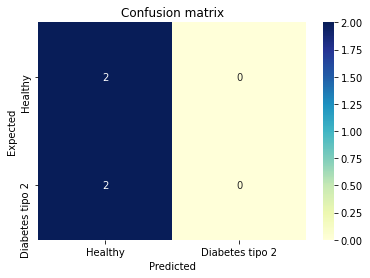

<Figure size 432x288 with 0 Axes>

In [54]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]
objetivo=[]
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

In [55]:

objetivo

array([0, 0, 0, 0])

# Spectograma sin Filtro vancouver

In [56]:
path_dataset = 'archive/innerArm.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)

## XGBClassifier

[21:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

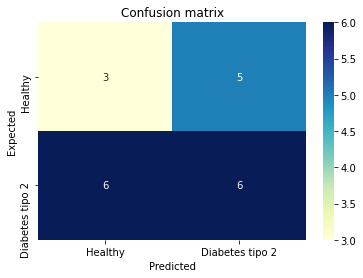

<Figure size 432x288 with 0 Axes>

In [57]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.33      0.38        12
         1.0       0.27      0.38      0.32         8

    accuracy                           0.35        20
   macro avg       0.36      0.35      0.35        20
weighted avg       0.38      0.35      0.35        20



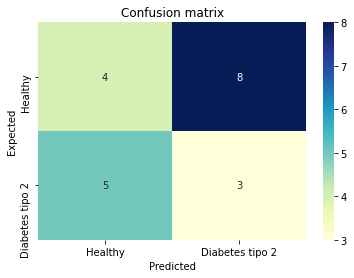

<Figure size 432x288 with 0 Axes>

In [58]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.33      0.38        12
         1.0       0.27      0.38      0.32         8

    accuracy                           0.35        20
   macro avg       0.36      0.35      0.35        20
weighted avg       0.38      0.35      0.35        20



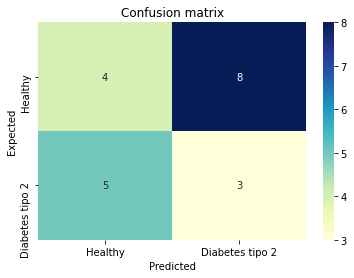

<Figure size 432x288 with 0 Axes>

In [59]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.25      0.15         4
         1.0       0.73      0.50      0.59        16

    accuracy                           0.45        20
   macro avg       0.42      0.38      0.37        20
weighted avg       0.60      0.45      0.50        20



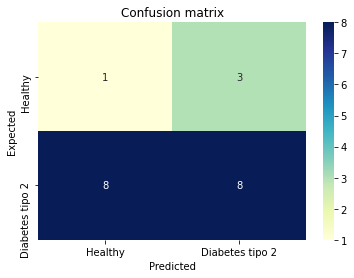

<Figure size 432x288 with 0 Axes>

In [60]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                50576     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 50,865
Trainable params: 50,865
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



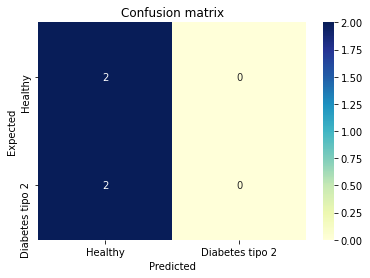

<Figure size 432x288 with 0 Axes>

In [61]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma sin Filtro vancouver con PCA

shape of X_pca (20, 5)
[0.87776606 0.08875687 0.00727749 0.0041358  0.00368959]
suma: 0.9816258143230213
shape of X_pca (20, 5)
[0.87776606 0.08875687 0.00727749 0.0041358  0.00368959]
suma: 0.9816258143230213


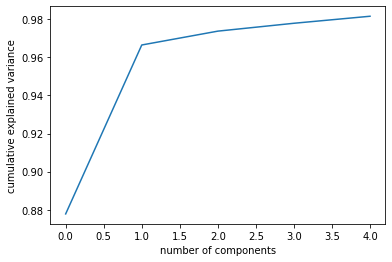

In [62]:
eardata = PCA_conversion(eardata,5,"innerArm")

## XGBClassifier

[21:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

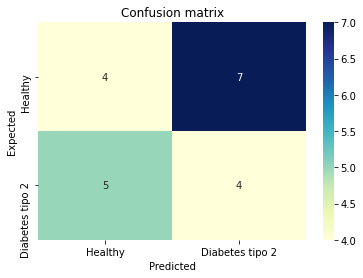

<Figure size 432x288 with 0 Axes>

In [63]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.27      0.30        11
         1.0       0.27      0.33      0.30         9

    accuracy                           0.30        20
   macro avg       0.30      0.30      0.30        20
weighted avg       0.31      0.30      0.30        20



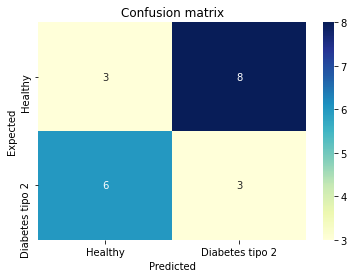

<Figure size 432x288 with 0 Axes>

In [64]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.43      0.38         7
         1.0       0.64      0.54      0.58        13

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.53      0.50      0.51        20



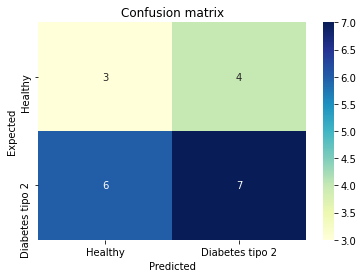

<Figure size 432x288 with 0 Axes>

In [65]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.82      0.50      0.62        18

    accuracy                           0.45        20
   macro avg       0.41      0.25      0.31        20
weighted avg       0.74      0.45      0.56        20



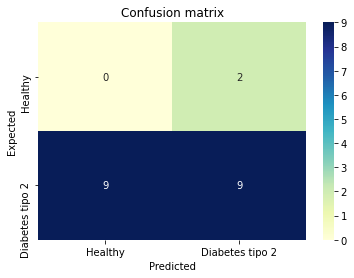

<Figure size 432x288 with 0 Axes>

In [66]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



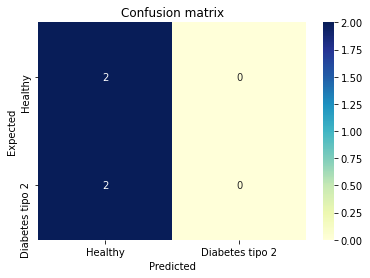

<Figure size 432x288 with 0 Axes>

In [67]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver  

In [68]:
path_dataset = 'archive/innerArm.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)
eardata = eardata.iloc[: , 800:]
eardata = eardata.iloc[: , :1000]

## XGBClassifier

[21:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

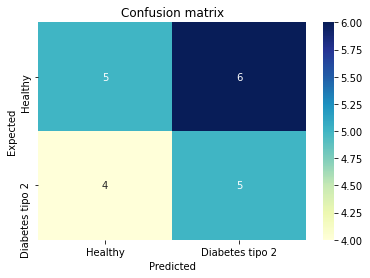

<Figure size 432x288 with 0 Axes>

In [69]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         9
         1.0       0.45      0.45      0.45        11

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



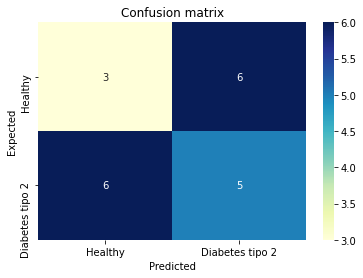

<Figure size 432x288 with 0 Axes>

In [70]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.33      0.38        12
         1.0       0.27      0.38      0.32         8

    accuracy                           0.35        20
   macro avg       0.36      0.35      0.35        20
weighted avg       0.38      0.35      0.35        20



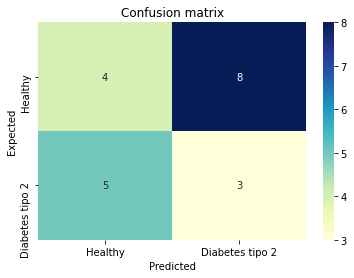

<Figure size 432x288 with 0 Axes>

In [71]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.91      0.53      0.67        19

    accuracy                           0.50        20
   macro avg       0.45      0.26      0.33        20
weighted avg       0.86      0.50      0.63        20



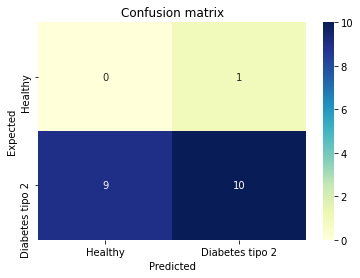

<Figure size 432x288 with 0 Axes>

In [72]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



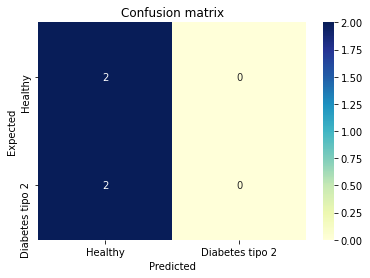

<Figure size 432x288 with 0 Axes>

In [73]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver   con PCA

shape of X_pca (20, 5)
[9.91964785e-01 3.74195108e-03 1.40461053e-03 4.40847591e-04
 3.31240013e-04]
suma: 0.9978834338341671
shape of X_pca (20, 5)
[9.91964785e-01 3.74195108e-03 1.40461053e-03 4.40847591e-04
 3.31240013e-04]
suma: 0.9978834338341671


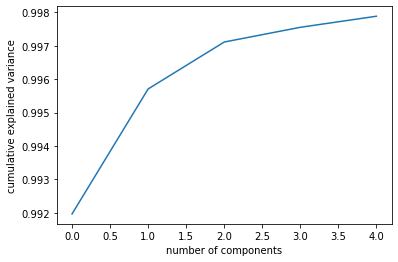

In [74]:
eardata = PCA_conversion(eardata,5,"innerArm")

## XGBClassifier

[21:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

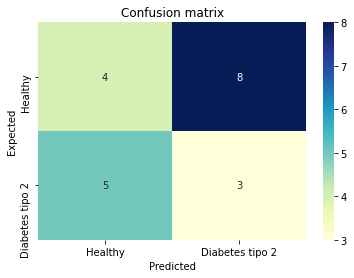

<Figure size 432x288 with 0 Axes>

In [75]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.14      0.12         7
         1.0       0.45      0.38      0.42        13

    accuracy                           0.30        20
   macro avg       0.28      0.26      0.27        20
weighted avg       0.33      0.30      0.31        20



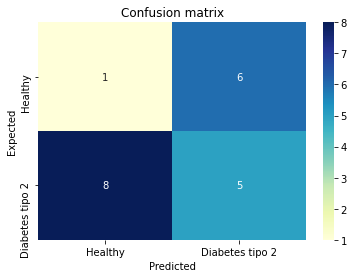

<Figure size 432x288 with 0 Axes>

In [76]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.36      0.40        11
         1.0       0.36      0.44      0.40         9

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.41      0.40      0.40        20



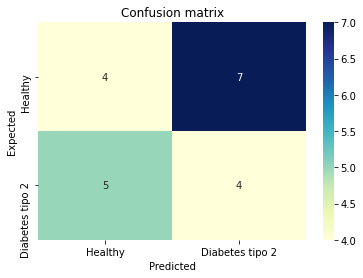

<Figure size 432x288 with 0 Axes>

In [77]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71        20

    accuracy                           0.55        20
   macro avg       0.50      0.28      0.35        20
weighted avg       1.00      0.55      0.71        20



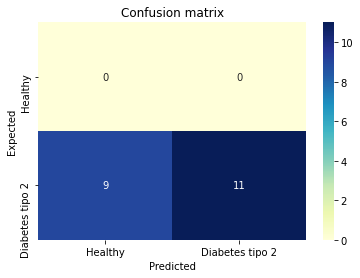

<Figure size 432x288 with 0 Axes>

In [78]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



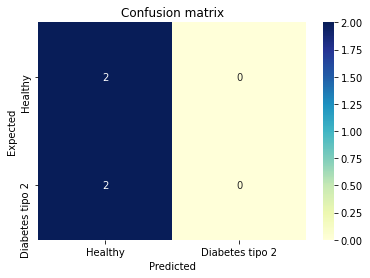

<Figure size 432x288 with 0 Axes>

In [79]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")